In [143]:
#IMPORTING LIBRARIES
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import keras
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

In [146]:
!pip install sweetviz

In [186]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/hotelPrediction/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/hotelPrediction/test.csv')

In [187]:
df[df['reviews_per_month'].isnull()]

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
7,48755,Manhattan,40.75288,-73.97269,Shared room,380,3,0,NaN,273812306,1,0
10,47512,Brooklyn,40.63293,-73.97117,Private room,86,2,0,NaN,117987098,1,1
13,39743,Manhattan,40.72886,-73.99139,Private room,179,1,0,NaN,213781715,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2851,16832,Manhattan,40.76207,-73.99937,Private room,239,30,0,NaN,30283594,121,1
2858,46266,Bronx,40.83466,-73.90278,Shared room,100,3,0,NaN,195028276,1,1
2860,43233,Manhattan,40.74250,-73.99443,Private room,260,29,0,NaN,219517861,327,1
2865,47852,Manhattan,40.74316,-73.98038,Private room,400,2,0,NaN,270096906,1,1


The Null values are MNAR (Missing Not At Random). So They can be imputed with zero since they are null if 'number of reviews' column is 0.

In [188]:
df_train = df.drop(columns=['id','latitude','longitude','owner_id'])
df_test = test.drop(columns=['id','latitude','longitude','owner_id'])

Numerical *Data*

In [189]:
df_Numerical = df_train[['cost','minimum_nights','number_of_reviews','reviews_per_month','owned_hotels']].fillna(0)

In [190]:
df_Numerical.corr()

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels
cost,1.000000,0.052918,-0.074432,-0.123086,0.032185
minimum_nights,0.052918,1.000000,-0.088767,-0.139803,0.107893
number_of_reviews,-0.074432,-0.088767,1.000000,0.576553,-0.112328
reviews_per_month,-0.123086,-0.139803,0.576553,1.000000,-0.147011
owned_hotels,0.032185,0.107893,-0.112328,-0.147011,1.000000


None of the columns are correlated. So all are important Features

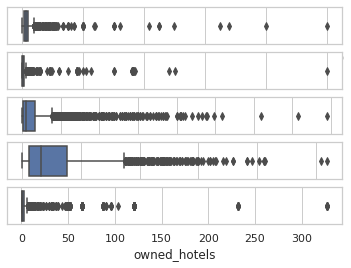

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5)
sns.set_theme(style="whitegrid")
for i,column in enumerate(['cost','minimum_nights','number_of_reviews','reviews_per_month','owned_hotels']):
   sns.boxplot(x=df_train[column],ax = ax[i])

We can understand that the features are highly varying in range because there could be hotels that have heavy inflow of visitors at a certain time like seasonally and very less flow of visitors off season.Also based on location and popularity there could be different number of visitors in each of the hotels ranging from very low numbers for few hotels and very high for others. So the range is broad. 
So it is better we normalize the data before we feed it to our model.

In [192]:
df_train  = pd.get_dummies(df_train, drop_first =True).fillna(0)
df_test  = pd.get_dummies(df_test, drop_first =True).fillna(0)
df_train

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
0,170,5,7,0.56,1,0,0,1,0,0,0,0
1,65,3,238,2.30,1,0,1,0,0,0,0,0
2,85,1,0,0.00,1,1,0,0,1,0,1,0
3,210,30,0,0.00,65,1,0,1,0,0,1,0
4,75,3,38,0.42,3,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2865,400,2,0,0.00,1,1,0,1,0,0,1,0
2866,180,3,2,0.07,1,1,0,1,0,0,1,0
2867,179,3,17,0.67,1,0,0,1,0,0,0,0
2868,200,30,0,0.00,49,1,0,1,0,0,1,0


In [193]:
from sklearn.manifold import TSNE

In [194]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_train.values)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2870 samples in 0.006s...
[t-SNE] Computed neighbors for 2870 samples in 0.129s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2870
[t-SNE] Computed conditional probabilities for sample 2000 / 2870
[t-SNE] Computed conditional probabilities for sample 2870 / 2870
[t-SNE] Mean sigma: 4.797915
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.014282
[t-SNE] KL divergence after 300 iterations: 0.848540


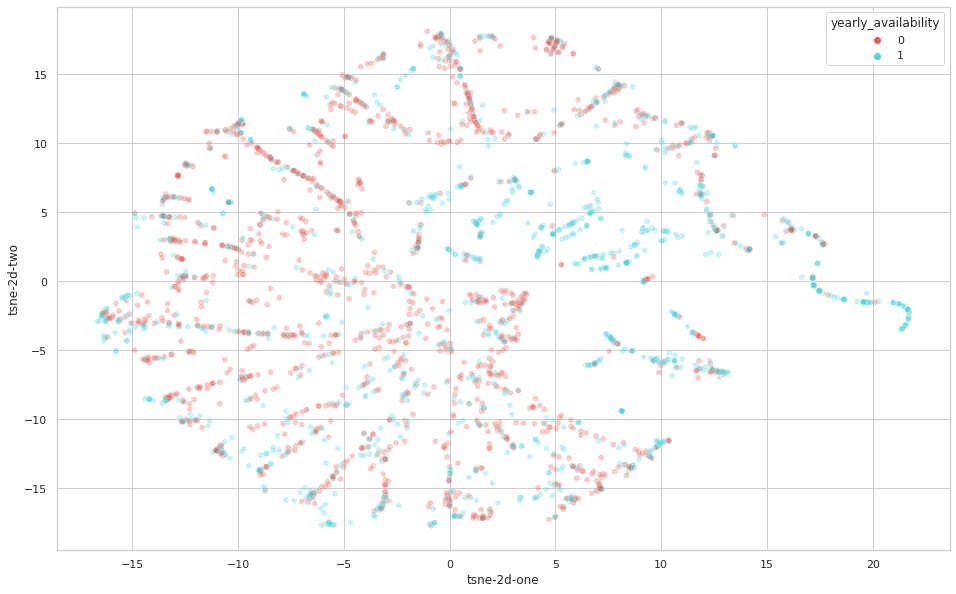

In [195]:
df_train['tsne-2d-one'] = tsne_results[:,0]
df_train['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="yearly_availability",
    palette=sns.color_palette("hls", 2),
    data=df_train,
    legend="full",
    alpha=0.3
)

From the 2D visualization of the features using t-sne plot it is clear that the decision boundary to classify the yearly availability of hotels is non linear. So we need universal approximator to estimate the decision boundary. So we go with Artificial Neural Network(ANN).

In [196]:
df_train=df_train.drop(['tsne-2d-one','tsne-2d-two'],axis=1)
df_train

,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
0,170,5,7,0.56,1,0,0,1,0,0,0,0
1,65,3,238,2.30,1,0,1,0,0,0,0,0
2,85,1,0,0.00,1,1,0,0,1,0,1,0
3,210,30,0,0.00,65,1,0,1,0,0,1,0
4,75,3,38,0.42,3,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2865,400,2,0,0.00,1,1,0,1,0,0,1,0
2866,180,3,2,0.07,1,1,0,1,0,0,1,0
2867,179,3,17,0.67,1,0,0,1,0,0,0,0
2868,200,30,0,0.00,49,1,0,1,0,0,1,0


In [197]:
X_train=df_train.drop('yearly_availability',axis=1)
y_train=df_train['yearly_availability']
X_train.columns

Index(['cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'owned_hotels', 'region_Brooklyn', 'region_Manhattan', 'region_Queens',
       'region_Staten Island', 'accommodation_type_Private room',
       'accommodation_type_Shared room'],
      dtype='object')

In [198]:
X_test=df_test

In [199]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train, y_train,random_state=4)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(2152, 11) (718, 11) (2152,) (718,)


In [200]:
from sklearn.preprocessing import StandardScaler
X1_train=StandardScaler().fit_transform(X1_train)
X1_train.shape

(2152, 11)

In [201]:
model1 = Sequential([
    keras.layers.Flatten(input_shape=(11,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [202]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X1_train, y1_train, epochs=15, batch_size=1)

Epoch 1/15
2152/2152 [==============================] - 4s 2ms/step - loss: 0.3989 - accuracy: 0.8439
Epoch 2/15
2152/2152 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.8862
Epoch 3/15
2152/2152 [==============================] - 3s 2ms/step - loss: 0.2905 - accuracy: 0.8894
Epoch 4/15
2152/2152 [==============================] - 3s 2ms/step - loss: 0.2793 - accuracy: 0.8908
Epoch 5/15
2152/2152 [==============================] - 3s 2ms/step - loss: 0.2714 - accuracy: 0.9038
Epoch 6/15
2152/2152 [==============================] - 3s 2ms/step - loss: 0.2646 - accuracy: 0.8987
Epoch 7/15
2152/2152 [==============================] - 3s 2ms/step - loss: 0.2561 - accuracy: 0.9052
Epoch 8/15
2152/2152 [==============================] - 3s 2ms/step - loss: 0.2499 - accuracy: 0.9103
Epoch 9/15
2152/2152 [==============================] - 3s 2ms/step - loss: 0.2464 - accuracy: 0.9122
Epoch 10/15
2152/2152 [==============================] - 3s 2ms/step - loss: 0.241

In [203]:
from sklearn.preprocessing import StandardScaler
X1_test=StandardScaler().fit_transform(X1_test)
X1_test

array([[-1.91316620e-01,  5.90325716e-01, -4.32343735e-01, ...,
        -6.47750276e-02, -8.25529423e-01,  1.76149287e+00],
       [-2.76509707e-01, -1.20371876e-01, -5.26936767e-01, ...,
        -6.47750276e-02,  1.21134386e+00, -5.67700281e-01],
       [-2.09304464e-02, -3.05771248e-01, -2.43157670e-01, ...,
        -6.47750276e-02,  1.21134386e+00, -5.67700281e-01],
       ...,
       [-1.27421805e-01, -2.74871353e-01, -4.00812724e-01, ...,
        -6.47750276e-02, -8.25529423e-01, -5.67700281e-01],
       [-2.27523682e-01, -2.43971457e-01,  9.86551752e-01, ...,
        -6.47750276e-02, -8.25529423e-01, -5.67700281e-01],
       [ 3.67825305e-04, -2.13071562e-01, -5.26936767e-01, ...,
        -6.47750276e-02, -8.25529423e-01,  1.76149287e+00]])

In [204]:
ypred4 = model1.predict(X1_test)
ypred5 = []
for value in ypred4:
  if value>0.5:
    ypred5.append(1)
  else:
    ypred5.append(0)
ypred4 = ypred5
ypred4

[1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [205]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
Precision1=precision_score(y1_test,ypred4)
print('Precision:',Precision1,'\n')
Accuracy1=accuracy_score(y1_test,ypred4)
print('Accuracy:',Accuracy1,'\n')
F12=f1_score(y1_test,ypred4)
print('F1:',F12,'\n')
Recall2=recall_score(y1_test,ypred4)
print('Recall:',Recall2,'\n')

Precision: 0.8820224719101124 

Accuracy: 0.9066852367688022 

F1: 0.9035971223021583 

Recall: 0.9262536873156342 



## Alternate Model

In [206]:
X_train=df_train.drop('yearly_availability',axis=1)
y_train=df_train['yearly_availability']

In [207]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train, y_train,random_state=4)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(2152, 11) (718, 11) (2152,) (718,)


In [208]:
from sklearn.model_selection import GridSearchCV
parameters = {
'n_estimators': [5,10,30,50,100]}

In [209]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
model = GridSearchCV(clf,param_grid=parameters, scoring='accuracy')
model.fit(X1_train,y1_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [5, 10, 30, 50, 100]},
             scoring='accuracy')

In [210]:
ypred4 = model.predict(X1_test)
ypred5 = []
for value in ypred4:
  if value>0.5:
    ypred5.append(1)
  else:
    ypred5.append(0)
ypred4 = ypred5
ypred4

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,


In [211]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
Precision1=precision_score(y1_test,ypred4)
print('Precision:',Precision1,'\n')
Accuracy1=accuracy_score(y1_test,ypred4)
print('Accuracy:',Accuracy1,'\n')
F12=f1_score(y1_test,ypred4)
print('F1:',F12,'\n')
Recall2=recall_score(y1_test,ypred4)
print('Recall:',Recall2,'\n')

Precision: 0.9085714285714286 

Accuracy: 0.9261838440111421 

F1: 0.9230769230769232 

Recall: 0.9380530973451328 



In [212]:
model.best_params_

{'n_estimators': 100}

In [213]:
clf=RandomForestClassifier(n_estimators=100)

In [214]:
clf.fit(X1_train,y1_train)

RandomForestClassifier()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'gini purity level')

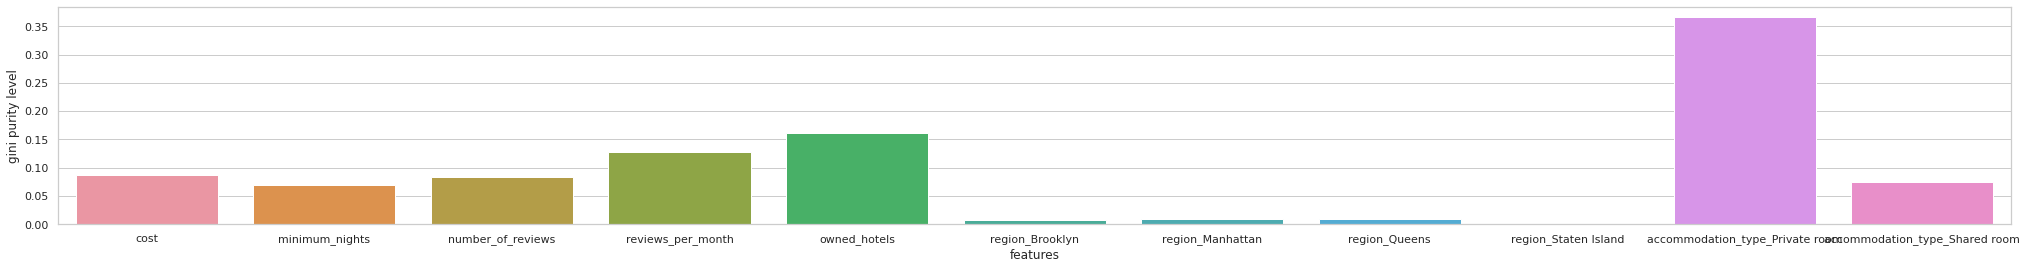

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(35,4))
sns.barplot(X1_train.columns,clf.feature_importances_)
plt.xlabel('features')
plt.ylabel('gini purity level')

In [216]:
from sklearn.model_selection import GridSearchCV
parameters = {
'n_estimators': [5,10,30,50,100]}

In [217]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
model = GridSearchCV(clf,param_grid=parameters, scoring='accuracy')
model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [5, 10, 30, 50, 100]},
             scoring='accuracy')

In [218]:
ypred = model.predict(X_test)
ypred10 = []
for value in ypred:
  if value>0.5:
    ypred10.append(1)
  else:
    ypred10.append(0)
ypred = ypred10
ypred4

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
